## Exercício de Apoio Semana 04

O conjunto de dados deste exercício contém características de duas espécies de arroz. Use SVM para classificar as espécies de arroz. Faça os seguintes passos:

1. Crie o classificador usando todos os atributos (exceto id e Class).
2. Separe os dados em treinamento e teste.
3. Reduza a escala dos valores dos atributos para agilizar a execução do código.
4. Use a função de kernel polinomial.
5.  Verifique a acurácia do classificador.
6. Crie novamente o classificador, agora usando dois atributos (por exemplo, Area e MajorAxisLength) usando as funções kernel linear, polinomial e sigmoidal.
7. Repita os passos 2 e 3.
8. Verifique a acurácia dos classificadores.
9. Plote os resultados obtidos.
10. Qual foi o melhor desempenho que você obteve?

O conjunto de dados contém os atributos descritos a seguir, e está disponível no link abaixo:

[__ABRIR rice-classification.csv__](https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/rice-classification.csv)

##### Atributos:

- __id__: identificador do objeto
- __Area__: área do grão
- __MajorAxisLength__: tamanho do eixo principal
- __MinorAxisLength__: tamanho do eixo menor
- __Eccentricity__: excentricidade
- __ConvexArea__: área convexa
- __EquivDiameter__: diâmetro equivalente
- __Extent__: extensão
- __Perimeter__: perímetro
- __Roundness__: redondeza
- __AspectRation__: razão de aspecto
- __Class (atributo alvo)__: tipo de arroz (1 - Jasmine, 0 - Gonen)

##### Observações:

- Se necessário, use o código apresentado na videoaula 10 (Aplicação do algoritmo SVM) desta semana. Lá, há exemplos de como reduzir a escala de dados e de como plotar os resultados das SVMs.

- O dataset deste exercício é baseado no dataset Rice type classification, que está em:

[__LINK: Rice type classification__](https://www.kaggle.com/datasets/mssmartypants/rice-type-classification)

In [2]:
# 1. Nesta atividade, usaremos as bibliotecas scikit-learn, pandas, numpy e matplotlib. 
# Importe as bibliotecas.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize']=[15,10]
 
# 2. Importe a base de dados direto da URL e verifique as primeiras linhas. O arquivo contém 18185 registros.

url = 'https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/rice-classification.csv'
arroz = pd.read_csv(url, sep=',')
arroz.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


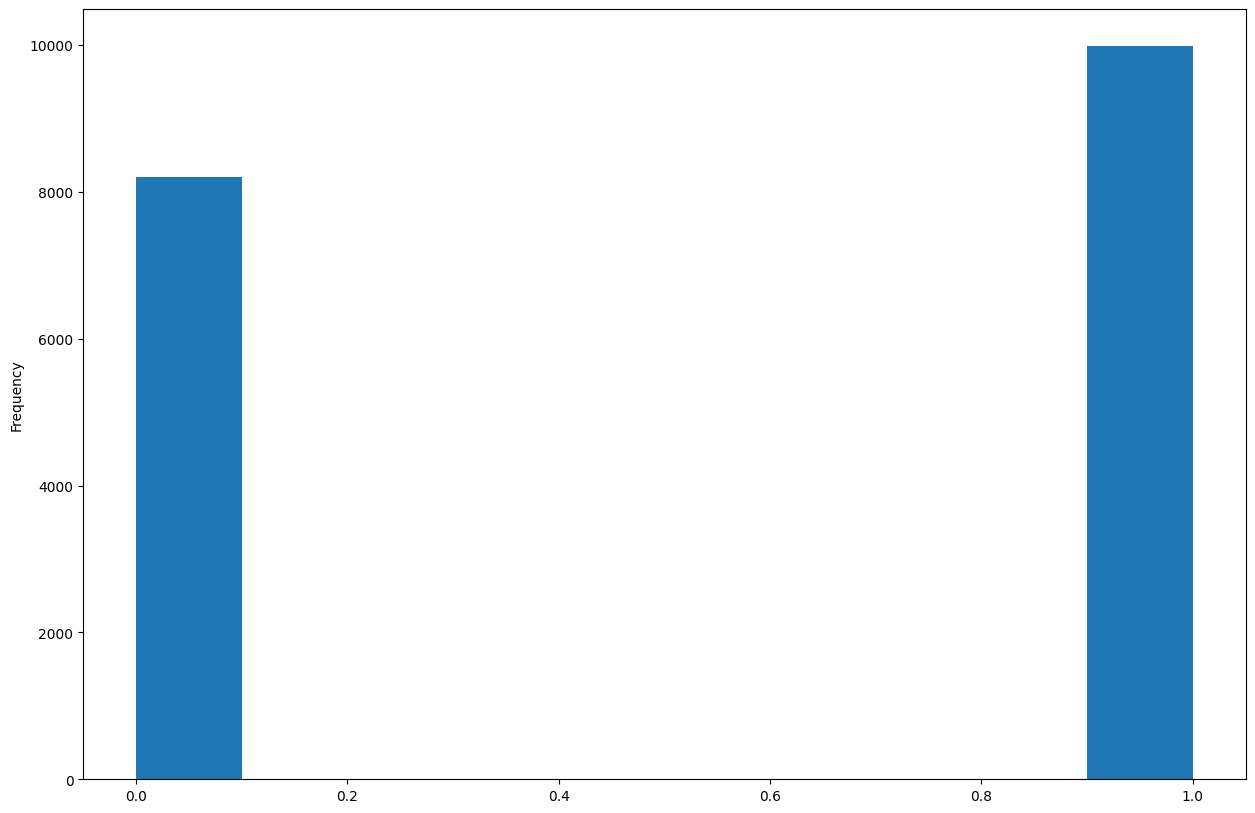

In [5]:
# 3. Vamos ver a distribuição do atributo classe.

arroz['Class'].plot.hist()
plt.show()

# A imagem é um gráfico de barras que exibe a distribuição de frequência de dois valores, 0 e 1. O eixo x representa os valores, enquanto o eixo y mostra as frequências. A barra correspondente ao valor 0 possui uma frequência de aproximadamente 8.000, e a barra referente ao valor 1 tem uma frequência de 10.000.

In [8]:
# 4. Selecionando todos os atributos.

atributos_todos = arroz[['Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Perimeter','Roundness','AspectRation']]

classes = arroz['Class']

classes.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [10]:
# 5. Agora, dividimos os dados entre treinamento (90%) e teste (10%).

arroz_treino_todos, arroz_teste_todos, classes_treino_todos, classes_teste_todos = train_test_split(atributos_todos, classes, test_size = 0.1)

arroz_treino_todos.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
10965,8673,152.869161,73.298862,0.877549,8957,105.084759,0.664598,371.596,0.789291,2.085560
9730,9072,154.878469,75.656528,0.872570,9343,107.474784,0.607432,376.808,0.802921,2.047126
12431,8183,150.885913,70.284357,0.884884,8452,102.073107,0.565749,364.727,0.773013,2.146792
17976,8925,168.317241,68.465487,0.913533,9102,106.600483,0.529642,392.574,0.727738,2.458425
7124,6911,165.239023,54.130851,0.944820,7097,93.804896,0.544860,367.758,0.642135,3.052585


In [11]:
arroz_teste_todos.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
12348,7615,145.264554,67.768386,0.884512,7789,98.466843,0.598664,350.932,0.777023,2.143545
9316,5520,152.166842,47.194577,0.950688,5675,83.834851,0.638741,337.455,0.609140,3.224244
5637,6954,163.372524,55.079800,0.941454,7127,94.096269,0.476106,363.090,0.662851,2.966106
8205,5884,155.061624,49.592844,0.947476,6114,86.554847,0.446570,340.158,0.639030,3.126694
9899,7617,142.007218,69.200510,0.873233,7771,98.479773,0.616861,344.680,0.805678,2.052112


In [12]:
classes_treino_todos.head()

10965    0
9730     0
12431    0
17976    0
7124     1
Name: Class, dtype: int64

In [13]:
classes_teste_todos.head()

12348    0
9316     1
5637     1
8205     1
9899     0
Name: Class, dtype: int64

In [15]:
# 6. Escalando os dados para acelerar a execução do treinamento do modelo e da geração do gráfico de visualização dos resultados.

scaler = StandardScaler()

arroz_treino_todos = scaler.fit_transform(arroz_treino_todos)

arroz_teste_todos = scaler.transform(arroz_teste_todos)

In [16]:
# 7. Treinando o modelo para gerar o classificador usando a função kernel polinomial.

# Os seguintes parâmetros de funções de kernel podem ser usados para aprimorar o modelo:

# C: determina se a margem será mais ajustada (C grande) ou mais larga (C pequeno)

# gamma: parâmetro de ajuste para as funções polinomial e sigmoidal

# coef0: parâmetro kappa, constante usada nas funções polinomial e sigmoidal

# degree: grau da função polinomial


SVM_polinomial_todos = SVC(kernel = 'poly', degree = 3, gamma = 'scale', C = 1.0, coef0 = 2)

SVM_polinomial_todos.fit(arroz_treino_todos, classes_treino_todos)

SVC(coef0=2, kernel='poly')

In [17]:
# 8. Verificando a acurácia de classificação, cujo valor pode variar dependendo do conjunto usado no treinamento.
# Acurácia de classificação com todos os atributos: 99.3%

predicao_todos = SVM_polinomial_todos.predict(arroz_teste_todos)

acuracia_todos = accuracy_score(classes_teste_todos,predicao_todos)

print('Acurácia de classificação com os todos atributos: {}'.format(round(acuracia_todos,3)*100)+'%')

Acurácia de classificação com os todos atributos: 99.0%


In [19]:
# 9. Criando um novo conjunto com apenas dois atributos para plotar os resultados.

atributos = arroz[['Area','MajorAxisLength']]

classes = arroz['Class']

classes.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [20]:
# 10. Separando o conjunto em treinamento e teste.

arroz_treino, arroz_teste, classes_treino, classes_teste = train_test_split(atributos, classes, test_size = 0.1)

print(arroz_treino.shape)
print(arroz_teste.shape)
print(classes_treino.shape)
print(classes_teste.shape)

(16366, 2)
(1819, 2)
(16366,)
(1819,)


In [22]:
# 11. Escalando os dados para acelerar a execução do treinamento do modelo e da geração do gráfico de visualização dos resultados.

scaler = StandardScaler()

arroz_treino = scaler.fit_transform(arroz_treino)

arroz_teste = scaler.transform(arroz_teste)

In [23]:
# 12. Gerando o classificador linear.

SVM_linear = SVC(kernel = 'linear', C = 0.2)

SVM_linear.fit(arroz_treino, classes_treino)

SVC(C=0.2, kernel='linear')

In [24]:
# 13. Verificando a acurácia de classificação.
# Acurácia de classificação da SVM linear com dois atributos: 99.1%

predicao_linear = SVM_linear.predict(arroz_teste)

acuracia_linear = accuracy_score(classes_teste,predicao_linear)

print('Acurácia de classificação da SVM linear com dois atributos: {}'.format(round(acuracia_linear,3)*100)+'%')


Acurácia de classificação da SVM linear com dois atributos: 98.4%


In [ ]:
# 14. Vamos plotar o resultado olhando como o modelo classifica o conjunto de testes. Para isso, vamos criar uma função que usa as funções meshgrid do numpy, que cria um grid retangular, e contourf do matplotlib, que permite criar linhas e preencher áreas com cores.

#função que recebe os atributos e classes do conjunto de testes, o classificador SVM e plota os resultados

def visualizarSVM(atributos_t,classes_t,classificador):
    atributos, classes = atributos_t, classes_t

 

ano, salario = np.meshgrid(np.arange(start = atributos[:, 0].min() - 1, stop = atributos[:, 0].max() + 1, step = 0.01),

np.arange(start = atributos[:, 1].min() - 1, stop = atributos[:, 1].max() + 1, step = 0.01))

 

plt.contourf(ano, salario, classificador.predict(np.array([ano.ravel(), salario.ravel()]).T).reshape(ano.shape),

alpha = 0.75, cmap = ListedColormap(('red', 'green')))

 

plt.xlim(ano.min(), ano.max())

plt.ylim(salario.min(), salario.max())

 

for i, j in enumerate(np.unique(classes)):

    plt.scatter(atributos[classes == j, 0], atributos[classes == j, 1],

    color = ListedColormap(('red', 'green'))(i), label = j)

 

plt.title('Classificação SVM')

plt.xlabel('Ano')

plt.ylabel('Salário estimado')

plt.legend()

plt.show()


15. Vamos plotar o classificador linear.

visualizarSVM(arroz_teste, classes_teste, SVM_linear)

A imagem é um gráfico de dispersão que ilustra a classificação de pontos de dados utilizando uma máquina de vetores de suporte (SVM). O gráfico está dividido em duas regiões por uma linha de decisão reta:
          •	A região verde, à esquerda da linha, representa a classe 0.
          •	A região vermelha, à direita, representa a classe 1.
          Os pontos de dados são marcados como pontos coloridos:
          •	Pontos verdes estão na região verde, indicando a classificação para a classe 0.
          •	Pontos vermelhos estão na região vermelha, correspondendo à classe 1.
          
          Os eixos são rotulados como 'Salário estimado' no eixo x e 'Idade estimada' no eixo y. O título do gráfico é 'Classificação SVM', e há uma legenda no canto superior direito que indica o esquema de cores para cada classe.

In [25]:
# 16. Agora vamos treinar o modelo para gerar o classificador usando a função kernel polinomial.

SVM_polinomial = SVC(kernel = 'poly', degree = 3, gamma = 'scale', C = 1.0, coef0 = 2)

SVM_polinomial.fit(arroz_treino, classes_treino)

SVC(coef0=2, kernel='poly')

In [ ]:
# 17. Verificando a acurácia de classificação da SVM polinomial.
# Acurácia de classificação da SVM polinomial com dois atributos: 99.1%
predicao_poli = SVM_polinomial.predict(arroz_teste)

acuracia_poli = accuracy_score(classes_teste,predicao_poli)

print('Acurácia de classificação da SVM polinomial com dois atributos: {}'.format(round(acuracia_poli,3)*100)+'%')

Acurácia de classificação da SVM polinomial com dois atributos: 98.8%


In [27]:
# 18. Vamos plotar o classificador que usa a função polinomial.
# Este é um gráfico de dispersão que apresenta os resultados de classificação de um modelo de Máquina de Vetores de Suporte (SVM). Ele possui o título ''
# Classificação SVM' e os eixos são rotulados como: • 'Salario estimado' (no eixo y) • 'Anos' (no eixo x). A
# área é dividida em duas regiões: • A região verde representa a classe 1. • A região vermelha representa a
# classe 0. Os pontos de dados seguem a mesma convenção de cor: • Pontos verdes para a classe 1. • Pontos
# vermelhos para a classe 0.

visualizarSVM(arroz_teste, classes_teste, SVM_polinomial)

NameError: name 'visualizarSVM' is not defined

In [29]:
# 19. Vamos plotar o classificador que usa a função polinomial.

SVM_sigmoidal = SVC(kernel = 'sigmoid', gamma = 'scale', C = 2, coef0 = 2)

SVM_sigmoidal.fit(arroz_treino, classes_treino)

SVC(C=2, coef0=2, kernel='sigmoid')

In [30]:
# 20. Verificando a acurácia de classificação da SVM sigmoidal.
# Acurácia de classificação da SVM polinomial com dois atributos: 76.1%
predicao_sigmoidal = SVM_sigmoidal.predict(arroz_teste)

acuracia_sigmoidal = accuracy_score(classes_teste,predicao_sigmoidal)

print('Acurácia de classificação da SVM polinomial com dois atributos: {}'.format(round(acuracia_poli,3)*100)+'%')

Acurácia de classificação da SVM polinomial com dois atributos: 98.8%


21. Vamos plotar o classificador que usa a função sigmoidal.

O gráfico mostra duas regiões separadas: uma verde e outra vermelha. Existem pontos verdes na área verde e pontos vermelhos na área vermelha. Uma linha curva divide as duas regiões, representando a separação entre as classes.
Concluindo

Os resultados mostram que os classificadores gerados possuem bom desempenho para esse conjunto de dados, mesmo quando usamos apenas dois dos atributos. A função kernel sigmoidal possui uma acurácia um pouco abaixo das demais, e também demora mais para ser executada.

Experimente ver os resultados usando alterando as funções kernel e seus parâmetros para ver se consegue melhores resultados.

 

Versões das bibliotecas

Esse tutorial está usando as seguintes versões de bibliotecas:

matplotlib==3.2.2

numpy==1.21.6

pandas==1.3.5

scikit-learn==1.0.2